Prediction: 2.896570837125533


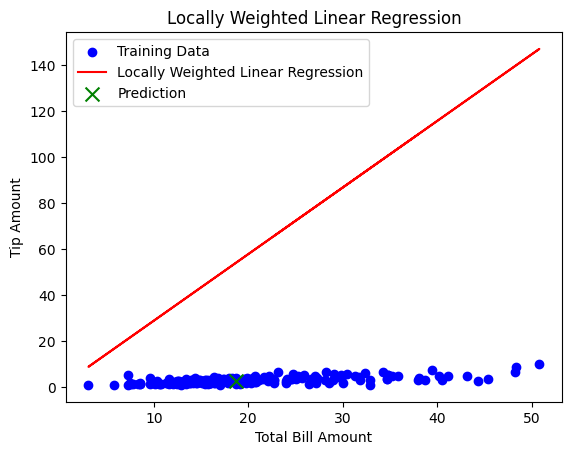

In [32]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def load_dataset(filename):
    data = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row
        for row in reader:
            data.append([float(row[0]), float(row[1])])
    return np.array(data)

def train_test_split(data, test_size=0.2):
    np.random.shuffle(data)
    split_index = int(len(data) * (1 - test_size))
    train_data = data[:split_index]
    test_data = data[split_index:]
    return train_data, test_data

def locally_weighted_regression(X_train, y_train, query_point, tau):
    m = X_train.shape[0]
    X_train = X_train.reshape((-1, 1))  # Reshape X_train to ensure it is a 2D array
    X_train = np.hstack((np.ones((m, 1)), X_train))  # Add a column of ones for the bias term
    
    # Calculate the weights
    weights = np.exp(-np.square(X_train[:, 1] - query_point) / (2 * tau ** 2))
    
    # Calculate theta using weighted least squares
    W = np.diag(weights)
    theta = np.linalg.inv(X_train.T.dot(W).dot(X_train)).dot(X_train.T).dot(W).dot(y_train)
    
    # Predict the value for the query point
    query_point = np.hstack((1, query_point))
    prediction = query_point.dot(theta)
    
    return prediction

# Example usage
data = load_dataset("bill2.csv")
train_data, test_data = train_test_split(data, test_size=0.2)

X_train = train_data[:, 0]
y_train = train_data[:, 1]

query_point = 18.71
tau = 300.0

prediction = locally_weighted_regression(X_train, y_train, query_point, tau)
print("Prediction:", prediction)

# Plotting the data and regression line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, X_train * prediction, color='red', label='Locally Weighted Linear Regression')
plt.scatter(query_point, prediction, color='green', marker='x', s=100, label='Prediction')
plt.xlabel('Total Bill Amount')
plt.ylabel('Tip Amount')
plt.title('Locally Weighted Linear Regression')
plt.legend()
plt.show()
